In [1]:
import pandas as pd
import bt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import talib

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
beginning = '2015-01-01'

# Import data
equity_list = ['AAPL', 'MCD', 'MSFT', 'TGT', 'GE', 'AMZN', 'ABBV', 'UPS', 'GM', 
               'IBM', 'PEP', 'VZ', 'DIS', 'INTC', 'FORD', 'CMCSA', 'IEF']
data = bt.get(equity_list, start=beginning)
data.head()


,aapl,mcd,msft,tgt,ge,amzn,abbv,ups,gm,ibm,pep,vz,dis,intc,ford,cmcsa,ief
Date,,,,,,,,,,,,,,,,,
2015-01-02,24.678247,76.591904,41.013309,61.158676,167.753342,15.4260,47.901779,88.137077,27.879503,112.178062,75.923973,33.484623,87.376259,29.616629,1.03,24.874538,94.238602
2015-01-05,23.983023,75.745995,40.636166,60.062649,164.674042,15.1095,47.000317,86.372437,27.471397,110.412971,75.353180,33.206543,86.099403,29.282669,1.11,24.367256,94.813629
2015-01-06,23.985283,75.885620,40.039738,60.054520,161.126175,14.7645,46.767677,85.805519,27.887505,108.031792,74.782387,33.541683,85.642708,28.736937,1.21,24.049379,95.450546
2015-01-07,24.321608,77.207848,40.548454,62.327778,161.193115,14.9210,48.657856,86.603989,28.679714,107.325752,76.969109,33.325226,86.518814,29.339680,1.15,24.027611,95.432808
2015-01-08,25.256100,77.495293,41.741295,62.620045,163.134369,15.0230,49.166756,88.161057,28.967800,109.658478,78.367996,34.039494,87.413536,29.885427,1.11,24.550144,95.043556


In [4]:
# We will need the risk-free rate to get correct Sharpe Ratios 
riskfree =  bt.get('^IRX', start=beginning)
# Convert risk free from % to decimal
riskfree_rate = float(riskfree.mean()) / 100
# Print out the risk free rate to make sure it looks good
print(riskfree_rate)



0.007851019744859243


In [5]:
s_mark = bt.Strategy('Markowitz', 
                       [bt.algos.RunEveryNPeriods(30, offset=30),
                       bt.algos.SelectAll(),
                       bt.algos.WeighMeanVar(lookback=pd.DateOffset(months=3),bounds=(0.025,0.2), rf=riskfree_rate),
                       bt.algos.Rebalance()])

b_mark = bt.Backtest(s_mark, data)

In [6]:
eq_strategy = bt.Strategy('EqualWeight', 
                       [bt.algos.RunEveryNPeriods(30, offset=30),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

bt_eq_strategy = bt.Backtest(eq_strategy, data)

In [7]:
strategies = [b_mark, bt_eq_strategy]

In [8]:
for strategy in strategies:
    
    print('-------------------------------------------------')
    print('Strategy --> ' + strategy.name)
    
    result = bt.run(strategy)
    result.set_riskfree_rate(riskfree_rate)
    
    # Show some performance metrics
    result.display()
    
    print('-------------------------------------------------')




-------------------------------------------------
Strategy --> Markowitz
Stat                 Markowitz
-------------------  -----------
Start                2015-01-01
End                  2022-06-13
Risk-free rate       0.79%

Total Return         185.34%
Daily Sharpe         0.62
Daily Sortino        1.12
CAGR                 15.12%
Max Drawdown         -33.37%
Calmar Ratio         0.45

MTD                  -7.44%
3m                   -15.40%
6m                   -22.46%
YTD                  -22.79%
1Y                   -30.97%
3Y (ann.)            13.42%
5Y (ann.)            12.75%
10Y (ann.)           -
Since Incep. (ann.)  15.12%

Daily Sharpe         0.62
Daily Sortino        1.12
Daily Mean (ann.)    17.79%
Daily Vol (ann.)     27.64%
Daily Skew           3.40
Daily Kurt           61.95
Best Day             30.27%
Worst Day            -13.54%

Monthly Sharpe       0.80
Monthly Sortino      1.71
Monthly Mean (ann.)  15.97%
Monthly Vol (ann.)   19.10%
Monthly Skew         0.60
M

-------------------------------------------------
Strategy --> Markowitz
-------------------------------------------------
-------------------------------------------------
Strategy --> EqualWeight
-------------------------------------------------


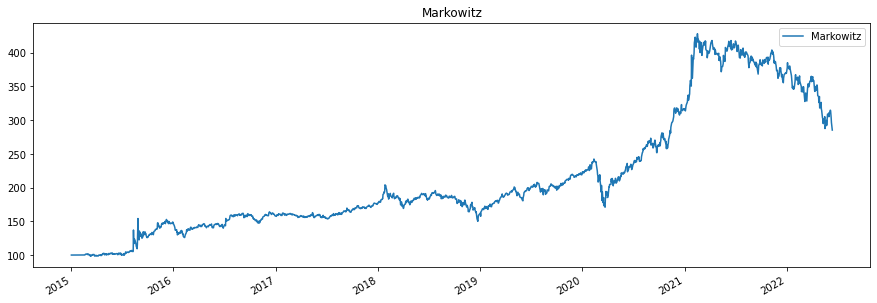

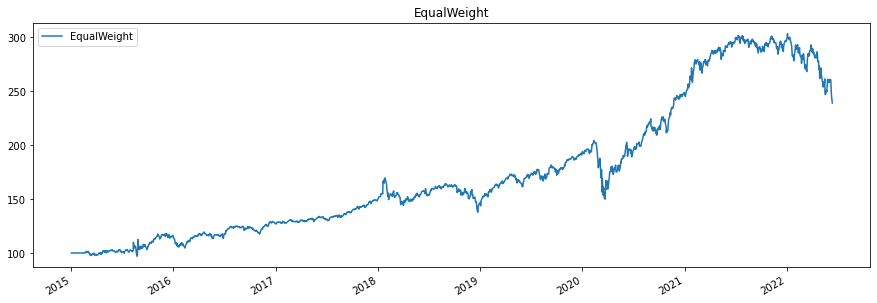

In [9]:
for strategy in strategies:
    
    print('-------------------------------------------------')
    print('Strategy --> ' + strategy.name)
    
    result = bt.run(strategy)
    result.set_riskfree_rate(riskfree_rate)
    
    # Show some performance metrics
    result.plot(title=strategy.name)
    
    print('-------------------------------------------------')




-------------------------------------------------
Strategy --> Markowitz
-------------------------------------------------
-------------------------------------------------
Strategy --> EqualWeight
-------------------------------------------------


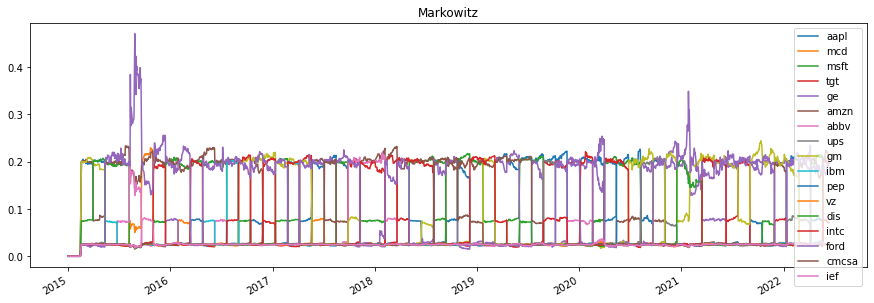

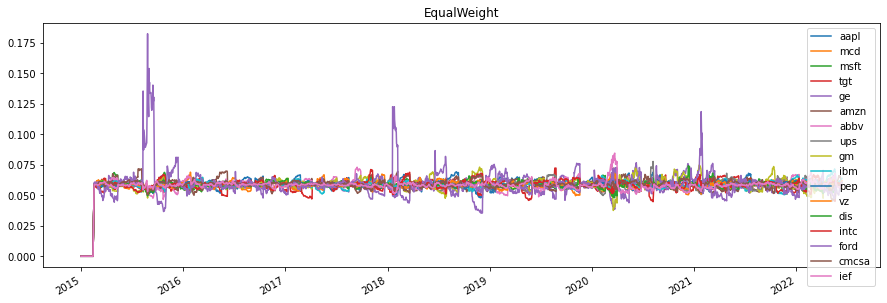

In [10]:
for strategy in strategies:
    
    print('-------------------------------------------------')
    print('Strategy --> ' + strategy.name)
    
    result = bt.run(strategy)
    result.set_riskfree_rate(riskfree_rate)
    
    # Plot Security Weights
    result.plot_security_weights(title=strategy.name)
    print('-------------------------------------------------')




In [11]:
# Import data
ticker2= 'nflx,tsla'
data_custom = bt.get(ticker2, start=beginning)
data_custom.head()

,nflx,tsla
Date,,
2015-01-02,49.848572,43.862000
2015-01-05,47.311428,42.018002
2015-01-06,46.501431,42.256001
2015-01-07,46.742859,42.189999
2015-01-08,47.779999,42.124001


In [12]:
s_mean_var_cust_tickers = bt.Strategy('MeanVarCustom', 
                       [bt.algos.RunEveryNPeriods(30, offset=30),
                       bt.algos.SelectAll(),
                       bt.algos.WeighMeanVar(lookback=pd.DateOffset(months=3),bounds=(0.025,0.2), rf=riskfree_rate),
                       bt.algos.Rebalance()])

s_mean_var_cust_tickers = bt.Backtest(s_mean_var_cust_tickers, data_custom)

In [13]:
print('-------------------------------------------------')
print('Strategy --> ' + s_mean_var_cust_tickers.name)

result = bt.run(s_mean_var_cust_tickers)
result.set_riskfree_rate(riskfree_rate)

# Show some performance metrics
result.display()

result.plot(title=s_mean_var_cust_tickers.name)

result.set_riskfree_rate(riskfree_rate)

# Plot Security Weights
result.plot_security_weights(title=s_mean_var_cust_tickers.name)

print('-------------------------------------------------')



-------------------------------------------------
Strategy --> MeanVarCustom


Exception: Positive directional derivative for linesearch